# NBA MVP predictor

## Project overview
It's eventually that time of the year when a new NBA season kicks off. As a basketball fan, other than supporting my own team, I am also always curious about who is going to be the MVP each year. So we decided to flex our muscles in machine learning and build a predictor on the MVP of each NBA season

## Dataset
The dataset that we are going to use is a huge datasets that records detailed statistics of every single player in the leagure since 1950. 

In [1]:
import pandas as pd
from collections import namedtuple
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
import matplotlib.pyplot as plt

## Some of the glossary that might help better understanding the dataset
* `Pos`:  Postion the player plays
* `Tm`:  Team the player plays for	
* `G`:  Number of game played
* `MP`:  Minutes Played
* `PER`:  Player Efficiency Rating, which sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance
* `TS%`:  True Shooting Percentage, a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws
* `3PAr`:  3-Point Attempt Rate to advanced stats, a measure of what percentage of a player's shots come from long-distance
* `FTr`:  Free throw rate, the ratio of free throws attempted per field goal attempted
* `ORB%`:  Offensive Rebound Percentage, an estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor
* `DRB%`: Defensive Rebound Percentage, an estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor
* `TRB%`: Total Rebound Percentage, an estimate of the percentage of available rebounds a player grabbed while he was on the floor
* `AST%`: Assist Percentage, an estimate of the percentage of teammate field goals a player assisted while he was on the floor
* `STL%`: Steal Percentage is an estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
* `BLK%`: block percentage is an estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor
* `TOV%`: Turnover percentage is an estimate of turnovers per 100 plays
* `USG%`: Usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor
* `OWS`: Offensive Win Shares
* `DWS`: Defensive Win Shares
* `WS`: Win Shares, an estimate of the number of wins contributed by a player
* `WS/48`: Win Shares Per 48 Minutes, an estimate of the number of wins contributed by the player per 48 minutes
* `OBPM`: Offensive Box Plus/Minus
* `DBPM`: Defensive Box Plus/Minus
* `BPM`: Box Plus/Minus
* `VORP`: Value Over Replacement Player, 
* `FG`: Field Goals (includes both 2-point field goals and 3-point field goals)
* `FGA`: Field Goal Attempts (includes both 2-point field goal attempts and 3-point field goal attempts)
* `FG%`: Field Goal Percentage; the formula is FG / FGA.
* `3P`: 3-Point Field Goals
* `3PA`: 3-Point Field Goal Attempts
* `3P%`: 3-Point Field Goal Percentage
* `2P`: 2-Point Field Goals
* `2PA`: 2-Point Field Goal Attempts
* `2P%`: 2-Point Field Goal Percentage; the formula is 2P / 2PA
* `eFG%`: Effective Field Goal Percentage, 
* `FT`: Free Throws
* `FTA`: Free Throw Attempts
* `FT%`: Free Throw Percentage
* `ORB`: Offensive Rebounds
* `DRB`: Defensive Rebounds
* `TRB`: Total Rebounds
* `AST`: Assists
* `STL`: Steals
* `BLK`: Blocks
* `TOV`: Turnovers
* `PF`:	Personal Fouls

## Load and display rough Player Data

Below I load the players data since 1940 and dispalys the first 5 entries of the data.

In [2]:
data = pd.read_csv('Seasons_Stats.csv').fillna(value = 0)
data.head() # display the first 5 entries of the data

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,488,1952.0,Paul Arizin*,SF,23.0,PHW,66.0,0.0,2939.0,25.5,...,0.818,0.0,0.0,745.0,170.0,0.0,0.0,0.0,250.0,1674.0
1,489,1952.0,Cliff Barker,SG,31.0,INO,44.0,0.0,494.0,10.8,...,0.588,0.0,0.0,81.0,70.0,0.0,0.0,0.0,56.0,126.0
2,490,1952.0,Don Barksdale*,PF,28.0,BLB,62.0,0.0,2014.0,15.8,...,0.691,0.0,0.0,601.0,137.0,0.0,0.0,0.0,230.0,781.0
3,491,1952.0,Leo Barnhorst,SF,27.0,INO,66.0,0.0,2344.0,15.9,...,0.652,0.0,0.0,430.0,255.0,0.0,0.0,0.0,196.0,820.0
4,492,1952.0,Elmer Behnke,C,22.0,MLH,4.0,0.0,55.0,7.8,...,0.571,0.0,0.0,17.0,4.0,0.0,0.0,0.0,13.0,16.0


## Filter the data
Data before 1980 does not have a complete record of all the statstistics. So we decide to train our model only based on data after 1980. 

In [3]:
# filter out data with before 1980
filter = data["Year"] >= 1980
data = data[filter]

In [4]:
Player = namedtuple('Player', ['Year','Name', 'Pos', 'Games','MP','PER','TSr','ThreePAr','FTRate','ORBr','DRBr','TRBr','ASTr','STLr','BLKr','TOVr','USGr','OWS','DWS','WS','WSper48','OBPM','DBPM','BPM','VORP','FG','FGA','FGr','ThreeP','ThreePA','ThreePr','TwoP','TwoPA','TwoPr','eFGr','FT','FTA','FTr','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])
mvps = {2017:'Russell Westbrook', 2016:'Stephen Curry', 2015:'Stephen Curry', 2014:'Kevin Durant', 2013:'LeBron James',2012:'LeBron James',2011:'Derrick Rose',2010:'LeBron James',2009:'LeBron James',2008:'Kobe Bryant',2007:'Dirk Nowitzki',2006:'Steve Nash',2005:'Steve Nash',2004:'Kevin Garnett',2003:'Tim Duncan',2002:'Tim Duncan',2001:'Allen Iverson',2000:'''Shaquille O'Neal''',1999:'Karl Malone',1998:'Michael Jordan',1997:'Karl Malone',1996:'Michael Jordan',1995:'David Robinson',1994:'Hakeem Olajuwon',1993:'Charles Barkley',1992:'Michael Jordan',1991:'Michael Jordan',1990:'Magic Johnson',1989:'Magic Johnson',1988:'Michael Jordan',1987:'Magic Johnson',1986:'Larry Bird',1985:'Larry Bird',1984:'Larry Bird',1983:'Moses Malone',1982:'Moses Malone',1981:'Julius Erving',1980:'Kareem Abdul-Jabbar'}

We will also need to combine a certain rows of data that represents the same player in the same year but having played for multiple teams. 

Since some statistics such as row.FT%, row.3p, etc are not valid because a valid string cannot have % in it or start with a number, we have to access them using their indices as below.
`11`:TS%,`12`:3PAr,`14`:ORB%,`15`:DRB%,`16`:TRB%,`17`:AST%,`18`:STL%,`19`:BLK%,`20`:TOV%,`21`:USG%,`26`:WS/48, `34`:FG%,`35`:3P,`36`:3PA,`37`:3P%,`38`:2P,`39`:2PA,`40`:2P%,`41`:eFG%,`44`:FT%

In [62]:
#Combine players who played for multiple teams in the same season
data_refined = []
y = []
mul_team_player = None
for row in data.itertuples():
    # get rid of the * at the end of some players' names
    player_name = None
    if row.Player[-1] == '*':
        player_name = row.Player[0:-1]   
    else:
        player_name = row.Player
    
    # when the current player is new or did not play for multiple teams in the same season
    if mul_team_player != player_name:
        
        data_refined.append(Player(row.Year,player_name,row.Pos,row.G,row.MP,row.PER,row[11],row[12],row.FTr,row[14],row[15],row[16],row[17],row[18],row[19],row[20],row[21],row.OWS,row.DWS,row.WS,row[26],row.OBPM,row.DBPM,row.BPM,row.VORP,row.FG,row.FGA,row[34],row[35],row[36],row[37],row[38],row[39],row[40],row[41],row.FT,row.FTA,row[44],row.ORB,row.DRB,row.TRB,row.AST,row.STL,row.BLK,row.TOV,row.PF,row.PTS))
        # if the team is TOT: the current play has played for multiple teams
        if row.Tm == "TOT":
            mul_team_player = row.Player # mark the name of mul_team_player

## Data visualization
Since right now the X_data uses all of the statistics, we want to plot the data and visualize the correlation between features and their contribution to MVP players. Specifically, we are plotting different features as x- and y- axis, and comparing MVP and non-MVP players

`The goal is to position the red dot(representing MVP of the year) to the upper right corner`

The feature we are visualizing are: 
* WS and BPM
* PER and VORP
* USGr and TSr 

MVP of year 2000 is Shaquille O'Neal


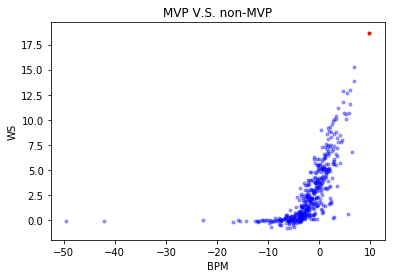

MVP of year 2001 is Allen Iverson


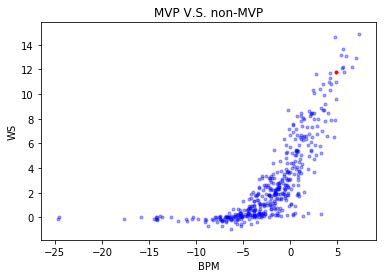

MVP of year 2002 is Tim Duncan


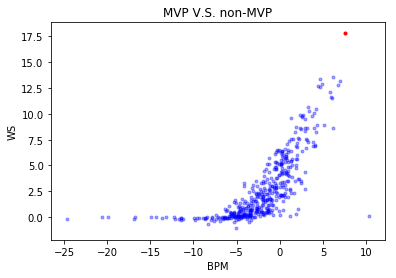

MVP of year 2003 is Tim Duncan


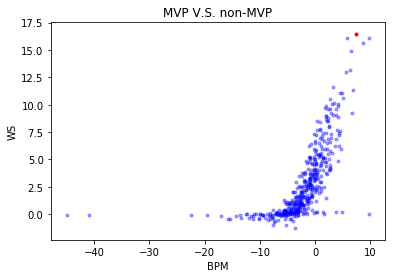

MVP of year 2004 is Kevin Garnett


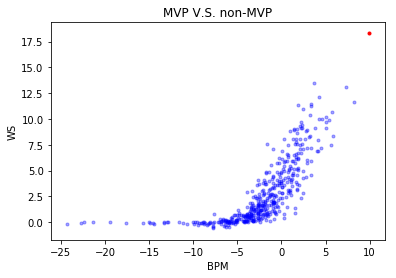

MVP of year 2005 is Steve Nash


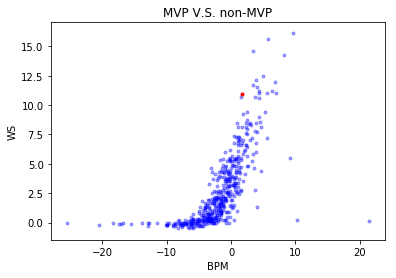

MVP of year 2006 is Steve Nash


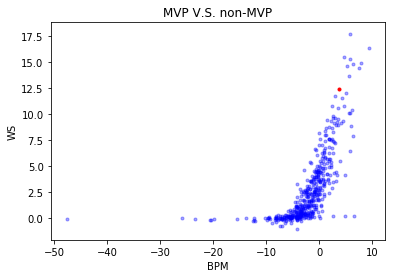

MVP of year 2007 is Dirk Nowitzki


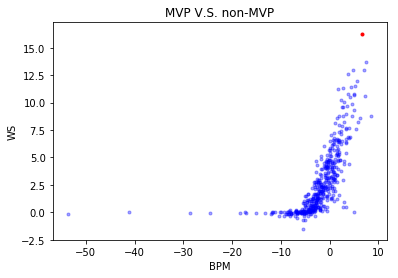

MVP of year 2008 is Kobe Bryant


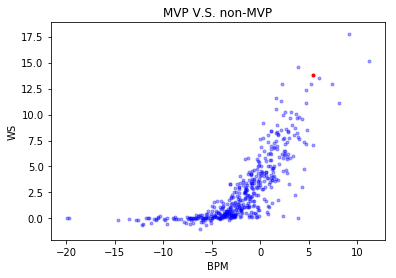

MVP of year 2009 is LeBron James


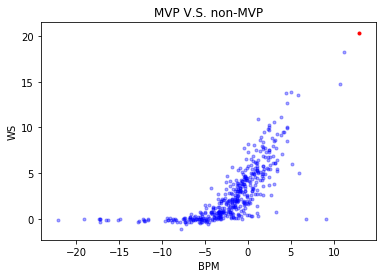

MVP of year 2010 is LeBron James


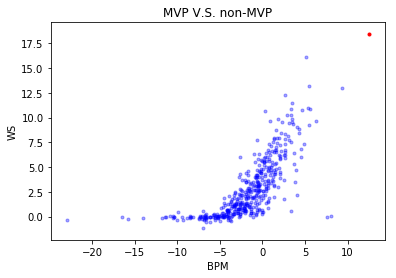

MVP of year 2011 is Derrick Rose


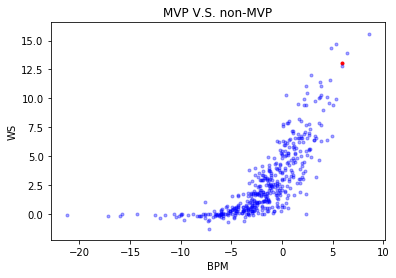

MVP of year 2012 is LeBron James


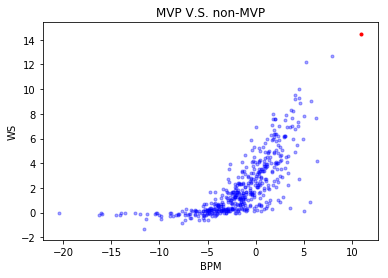

MVP of year 2013 is LeBron James


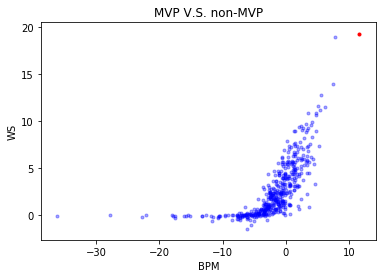

MVP of year 2014 is Kevin Durant


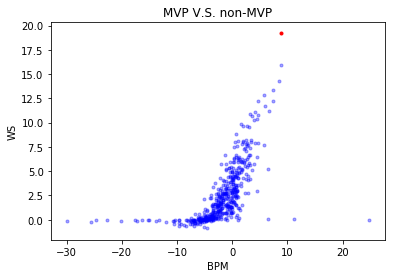

MVP of year 2015 is Stephen Curry


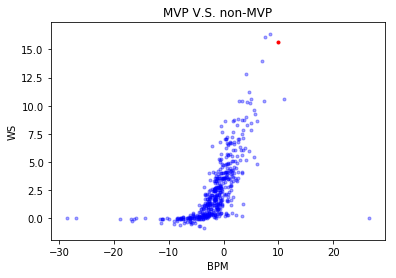

MVP of year 2016 is Stephen Curry


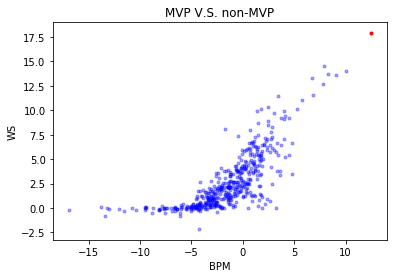

MVP of year 2017 is Russell Westbrook


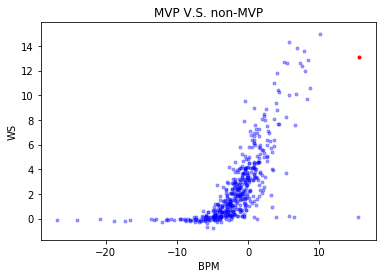

In [69]:
for cur_year in range(2000, 2018):
    for x in data_refined:
        if x.Year == cur_year:
            if mvps[int(x.Year)] == x.Name:
                print("MVP of year " + str(cur_year) + " is " + str(mvps[int(cur_year)]))
                plt.scatter(x.BPM, x.WS, color='r', marker=".")
            else:
                plt.scatter(x.BPM, x.WS, color='b', marker=".", alpha=.35)


    plt.title("MVP V.S. non-MVP")
    plt.xlabel("BPM")
    plt.ylabel("WS")
    plt.show()

MVP of year 2000 is Shaquille O'Neal


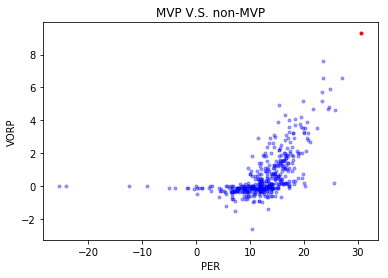

MVP of year 2001 is Allen Iverson


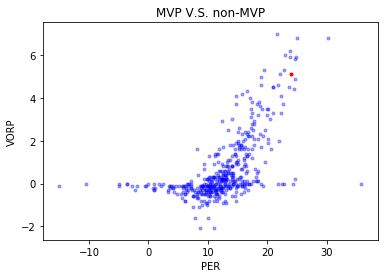

MVP of year 2002 is Tim Duncan


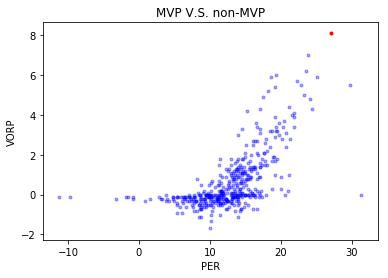

MVP of year 2003 is Tim Duncan


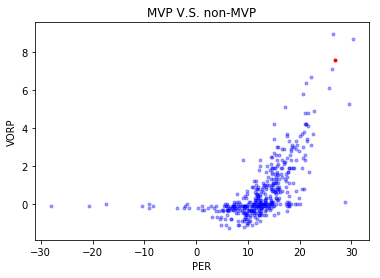

MVP of year 2004 is Kevin Garnett


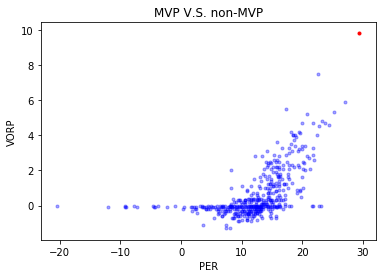

MVP of year 2005 is Steve Nash


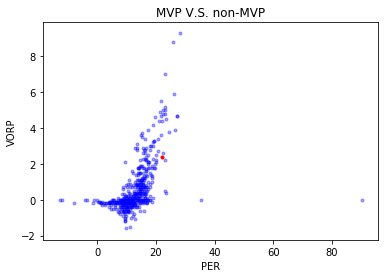

MVP of year 2006 is Steve Nash


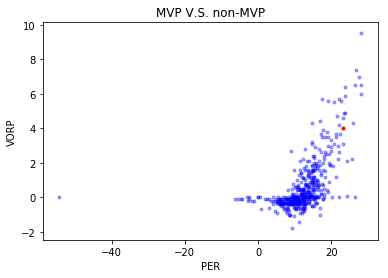

MVP of year 2007 is Dirk Nowitzki


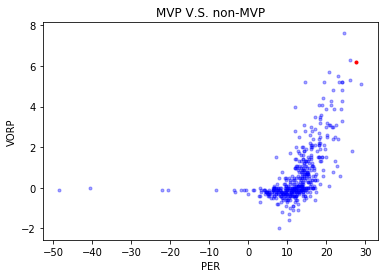

MVP of year 2008 is Kobe Bryant


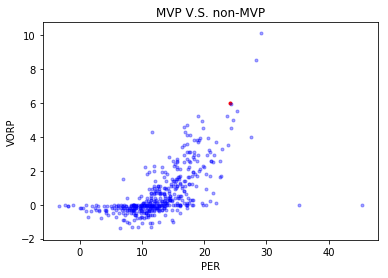

MVP of year 2009 is LeBron James


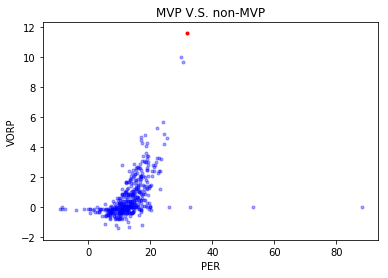

MVP of year 2010 is LeBron James


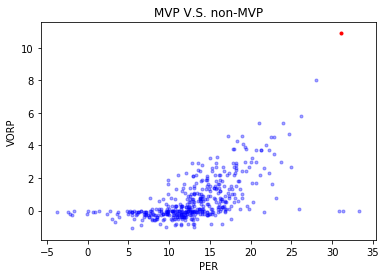

MVP of year 2011 is Derrick Rose


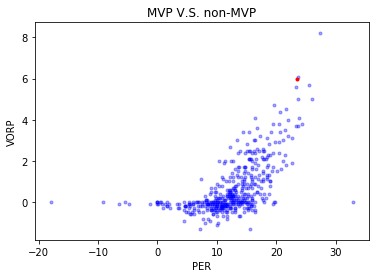

MVP of year 2012 is LeBron James


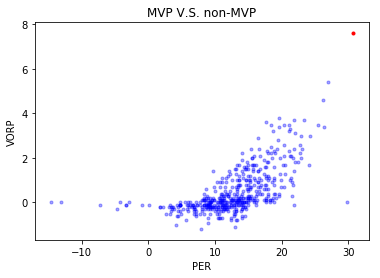

MVP of year 2013 is LeBron James


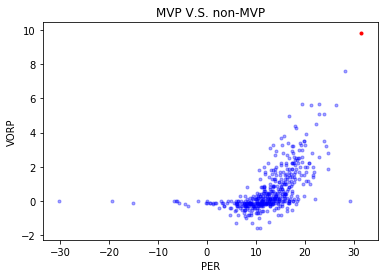

MVP of year 2014 is Kevin Durant


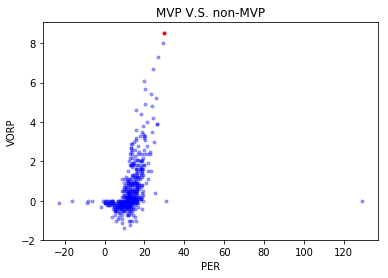

MVP of year 2015 is Stephen Curry


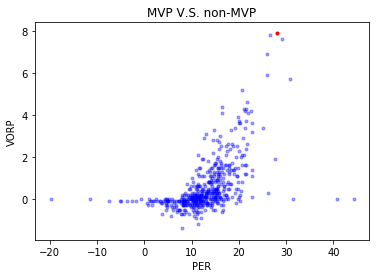

MVP of year 2016 is Stephen Curry


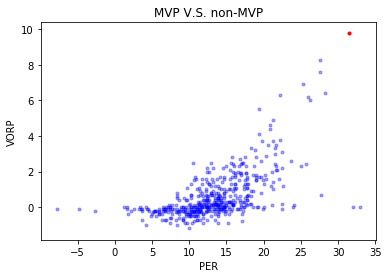

MVP of year 2017 is Russell Westbrook


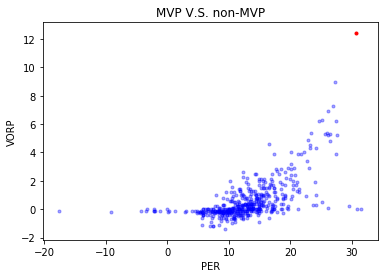

In [70]:
for cur_year in range(2000, 2018):
    for x in data_refined:
        if x.Year == cur_year:
            if mvps[int(x.Year)] == x.Name:
                print("MVP of year " + str(cur_year) + " is " + str(mvps[int(cur_year)]))
                plt.scatter(x.PER, x.VORP, color='r', marker=".")
            else:
                plt.scatter(x.PER, x.VORP, color='b', marker=".", alpha=.35)


    plt.title("MVP V.S. non-MVP")
    plt.xlabel("PER")
    plt.ylabel("VORP")
    plt.show()

MVP of year 2000 is Shaquille O'Neal


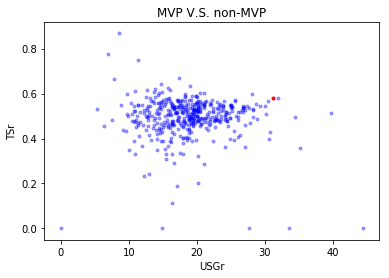

MVP of year 2001 is Allen Iverson


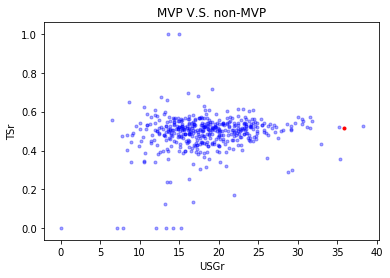

MVP of year 2002 is Tim Duncan


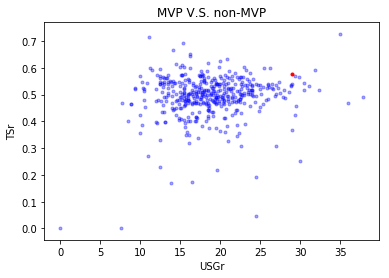

MVP of year 2003 is Tim Duncan


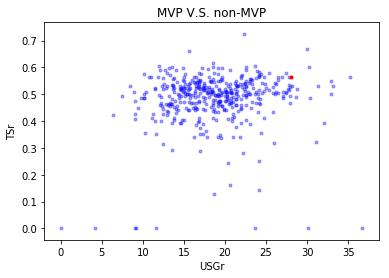

MVP of year 2004 is Kevin Garnett


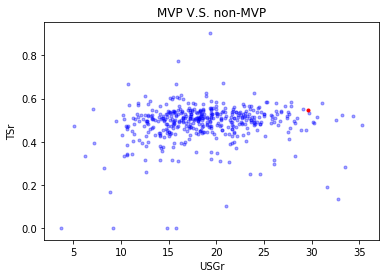

MVP of year 2005 is Steve Nash


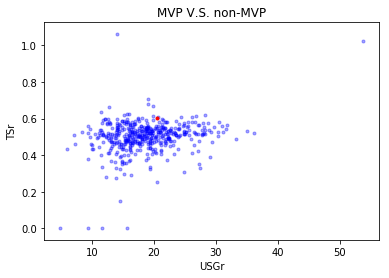

MVP of year 2006 is Steve Nash


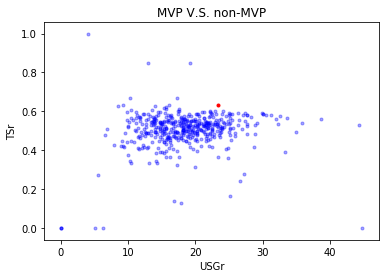

MVP of year 2007 is Dirk Nowitzki


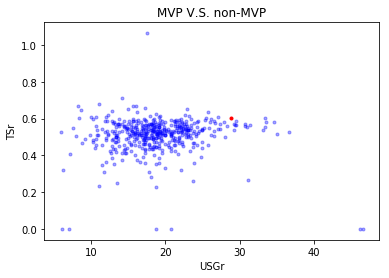

MVP of year 2008 is Kobe Bryant


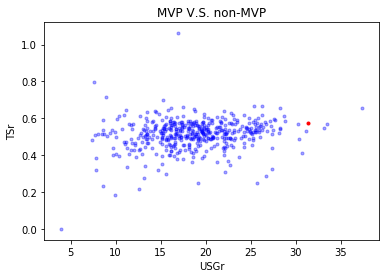

MVP of year 2009 is LeBron James


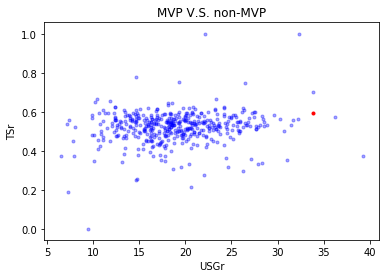

MVP of year 2010 is LeBron James


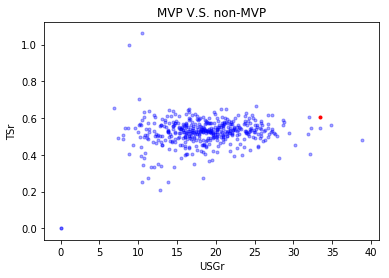

MVP of year 2011 is Derrick Rose


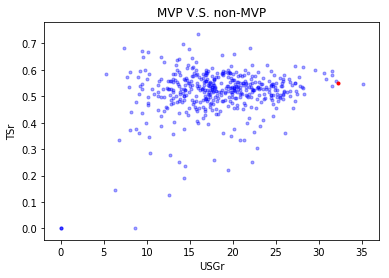

MVP of year 2012 is LeBron James


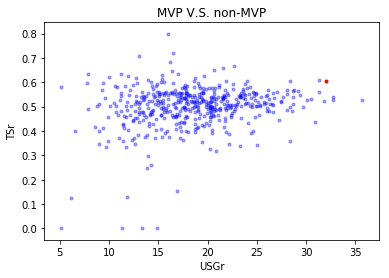

MVP of year 2013 is LeBron James


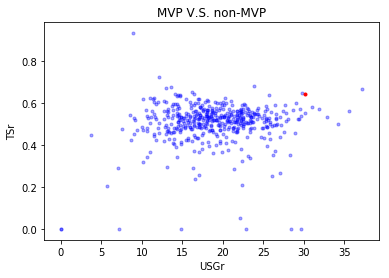

MVP of year 2014 is Kevin Durant


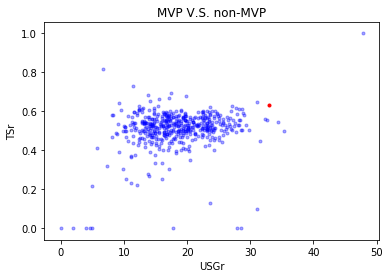

MVP of year 2015 is Stephen Curry


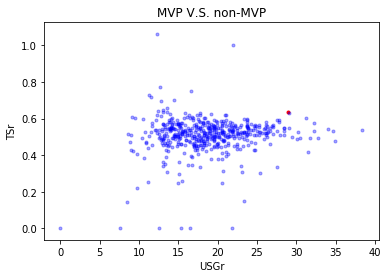

MVP of year 2016 is Stephen Curry


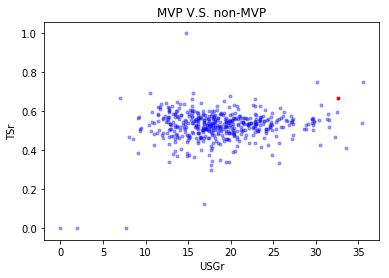

MVP of year 2017 is Russell Westbrook


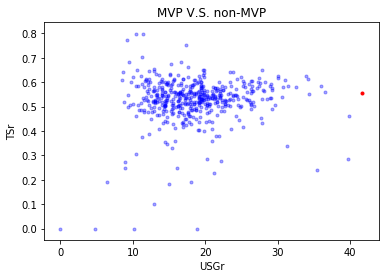

In [71]:
for cur_year in range(2000, 2018):
    for x in data_refined:
        if x.Year == cur_year:
            if mvps[int(x.Year)] == x.Name:
                print("MVP of year " + str(cur_year) + " is " + str(mvps[int(cur_year)]))
                plt.scatter(x.USGr, x.TSr, color='r', marker=".")
            else:
                plt.scatter(x.USGr, x.TSr, color='b', marker=".", alpha=.35)


    plt.title("MVP V.S. non-MVP")
    plt.xlabel("USGr")
    plt.ylabel("TSr")
    plt.show()

## Build the X_data and y_data
Construct the table that matches years with MVPs since 1980

X_data right now contains all the statistics as features
y_data is a binary factor where 1 represents MVP of the year and 0 represents non-MVP

In [ ]:
X_data = []
y_data = []
for d in data_refined:
    name = d.Name
    if name[-1] == '*':
        name = name[0:-1]
    if mvps[int(d.Year)] == name:
        y_data.append(1)
        
        if d.Games < 65:
            print(str(d.Name) + ": " + str(d.Games) + ", of year: " + str(d.Year))
    else:
        y_data.append(0)
        
    
    features = [d.Games,d.MP,d.PER,d.TSr,d.ThreePAr,d.FTRate,d.ORBr,d.DRBr,d.TRBr,d.ASTr,d.STLr,d.BLKr,d.TOVr,d.USGr,d.OWS,d.DWS,d.WS,d.WSper48,d.OBPM,d.DBPM,d.BPM,d.VORP,d.FG,d.FGA,d.FGr,d.ThreeP,d.ThreePA,d.ThreePr,d.TwoP,d.TwoPA,d.TwoPr,d.eFGr,d.FT,d.FTA,d.FTr,d.ORB,d.DRB,d.TRB,d.AST,d.STL,d.BLK,d.TOV,d.PF,d.PTS]
    X_data.append(features)   

In [ ]:
# divide our data into training set and testing set by 75:25
X_training = X_data[:len(X_data)*3//4]
y_training = y_data[:len(X_data)*3//4]
X_testing = X_data[len(X_data)*3//4:]
y_testing = y_data[len(X_data)*3//4:]

In [ ]:
def evaluate(pred, labels):
    TP=0
    TN=0
    FP=0
    FN=0
    for (a,b) in zip(pred, labels):
        if (a==True and b==True):
            TP = TP+1
        elif (a==True and b==False):
            FP = FP+1
        elif (a==False and b==True):
            FN = FN+1
        elif (a==False and b==False):
            TN = TN+1
    
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    BER = 1-(TPR+TNR)/2
    PRECISION = TP / (TP+FP)
    RECALL = TP / (TP+FN)
    print("Statistics for our training model: ")
    print("\nTrue positives: " + str(TP))
    print("True negatives: " + str(TN))
    print("False positives: " + str(FP))
    print("False negatives: " + str(FN))
    print("\nAccuracy: " + str((TP + TN)/len(pred)))
    print("BER is " + str(BER))
    print("Precision: " + str(PRECISION))
    print("Recall: " + str(RECALL))

In [ ]:
clf_RFC = RandomForestClassifier(max_depth=2, random_state=0,class_weight = {0:1,1:160})
clf_RFC.fit(X_training, y_training)
pred_RFC = clf_RFC.predict(X_testing)
evaluate(pred_RFC, y_testing)